In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')

import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
from read_roi import read_roi_file
from read_roi import read_roi_zip
import nd2reader
import tifffile as tff
from matplotlib.path import Path


In [2]:
imgPath = '/Users/zhengj10/Desktop/PB_vs_Ahmed/Donut roi'
imgFiles = glob(imgPath + '/*.tif')
imgFiles = sorted(imgFiles)
imgFiles


['/Users/zhengj10/Desktop/PB_vs_Ahmed/Donut roi/cell5.tif']

In [5]:
imgFile = tff.TiffFile(imgFiles[0])
imgFile = imgFile.asarray()
ref = np.mean(imgFile,axis=0)
ref.shape

(128, 512)

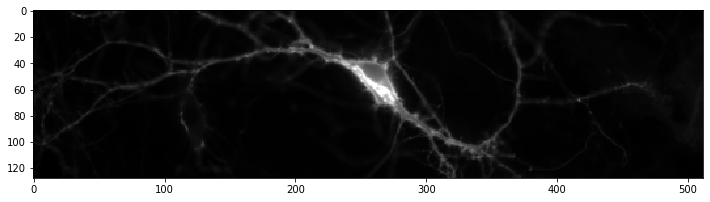

In [6]:
fig = plt.figure(figsize=[12,5])
sns.reset_orig()
vmin = np.min(ref)
vmax = np.max(ref)
plt.imshow(ref,cmap='gray',vmin=vmin,vmax=0.75*vmax)
plt.show()


In [7]:
# imsave('/Users/zhengj10/Desktop/cell5_ref.tif',ref.astype('float32'))

In [9]:
roizip = '/Users/zhengj10/Desktop/PB_vs_Ahmed/Donut roi/RoiSet.zip' # roi_1 is outer, roi_2 inner, roi_3 background
Fiji_rois = read_roi_zip(roizip)

In [10]:
rois = []
for key in(Fiji_rois):
    print(key)
    x = Fiji_rois[key]['x']
    y = Fiji_rois[key]['y']
    roi = [x,y]
    rois.append(roi)

0055-0259
0054-0259
0081-0199


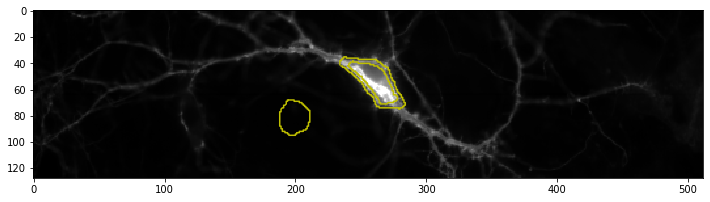

In [11]:
plt.figure(figsize=[12,12])
plt.imshow(ref,cmap='gray',vmin=vmin,vmax=0.75*vmax)
for roi in rois:
    plt.plot(roi[0],roi[1],color='y')
# plt.savefig('/Users/zhengj10/Desktop/ROI_pb_cell_edge.png')
plt.show()


In [12]:
rois_coordinates = []
for roi in rois:
    roi_coordinates = np.array([roi[1],roi[0]]) # To match X,Y with image
    roi_coordinates = roi_coordinates.transpose()
    print(roi_coordinates.shape)
    rois_coordinates.append(roi_coordinates)


(175, 2)
(137, 2)
(97, 2)


In [13]:
image_coordinates = []
for r in range(ref.shape[0]):
    for c in range(ref.shape[1]):
        image_coordinates.append([r,c])

p_roi_outer = Path(rois_coordinates[0])
ROI = p_roi_outer.contains_points(image_coordinates)
roi_outer = ROI.reshape(ref.shape)    

p_roi_inner = Path(rois_coordinates[1])
ROI = p_roi_inner.contains_points(image_coordinates)
roi_inner = ROI.reshape(ref.shape) 

roi = roi_outer^roi_inner # "^" is operand for boolean array subtraction

p_fb = Path(rois_coordinates[2])
ROI_fb = p_fb.contains_points(image_coordinates)
fb = ROI_fb.reshape(ref.shape)


In [14]:
np.mean(roi)


0.006805419921875

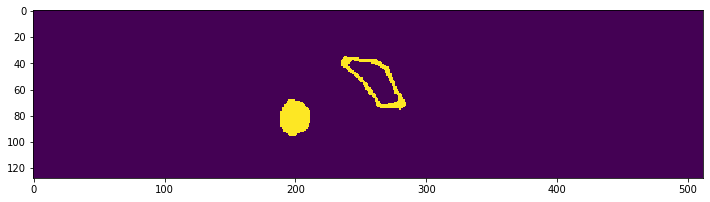

In [15]:
plt.figure(figsize=[12,12])
f_all = roi+fb
plt.imshow(f_all)
# plt.imshow(roi,cmap='gray')
plt.show()
